In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import tensorflow as tf

In [24]:
content_path = 'sample.jpg'
style_path = 'StarryNight.jpg'
size = image.load_img(content_path).size

content_layers = ['block4_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [4]:
def load_image(input_path, size):
    img = image.load_img(input_path, target_size=size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [5]:
def imshow(img):
    img = np.squeeze(img, axis=0)
    img = img.astype(np.uint8)
    plt.imshow(img)

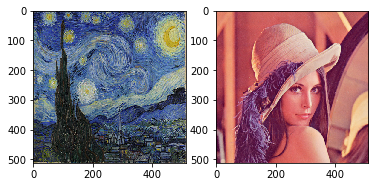

In [6]:
content_img = load_image(content_path, size)
style_img = load_image(style_path, size)
plt.subplot(1, 2, 1)
imshow(style_img)
plt.subplot(1, 2, 2)
imshow(content_img)

In [49]:
def get_vgg_model(layer_names):
    vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]
    model = tf.keras.Model(vgg.input, outputs)
    return model

In [57]:
def get_vgg_outputs(vgg, img):
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(img)
    outputs = vgg(preprocessed_input)
    return outputs

In [52]:
vgg = get_vgg_model(style_layers + content_layers)

noise_img = np.random.uniform(-20, 20, (1, size[0], size[1], 3)).astype(np.float32)
content_img = load_image(content_path, size)
style_img = load_image(style_path, size)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

NameError: name 'get_vgg_outputs' is not defined

In [69]:
content_outputs = get_vgg_outputs(vgg, content_img)
style_outputs = get_vgg_outputs(vgg, style_img)

In [ ]:
img = tf.Variable(noise_img)

def clip_0_1(img):
    return tf.clip_by_value(img, clip_value_min=0., clip_value_max=1.0)

opt = tf.optimizer.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

style_weight = 1e-2
content_wieght = 1e4

def loss(content_outputs, style_oututs):
    style_los 

In [70]:
for name, output in zip(style_layers, style_outputs):
    print(name)
    print("  shape: ", output.numpy().shape)
    print("  min: ", output.numpy().min())
    print("  max: ", output.numpy().max())
    print("  mean: ", output.numpy().mean())
    print()

block1_conv1
  shape:  (1, 512, 512, 64)
  min:  0.0
  max:  539.93475
  mean:  25.319223

block2_conv1
  shape:  (1, 256, 256, 128)
  min:  0.0
  max:  2865.322
  mean:  137.47636

block3_conv1
  shape:  (1, 128, 128, 256)
  min:  0.0
  max:  5987.903
  mean:  133.76588

block4_conv1
  shape:  (1, 64, 64, 512)
  min:  0.0
  max:  14270.858
  mean:  498.70242

block5_conv1
  shape:  (1, 32, 32, 512)
  min:  0.0
  max:  3121.283
  mean:  40.780434

